## Flight Price Prediction Kaggle
* target variable is price

### importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

## Loading Data

In [2]:
df1=pd.read_excel('~/Downloads/train data flight price prediction.xlsx')

df2=pd.read_excel('~/Downloads/test data flight price prediction.xlsx')

## Merging Train and Test Data

In [3]:
df=df1.append(df2)

## checking row and columns

In [4]:
df.shape

(13354, 11)

## Checking dtypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


## Standard Deviation

In [6]:
df.std()

Price    4611.359167
dtype: float64

In [7]:
# we have only one numerical variable as of now
df.describe().T 



,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [8]:
#store our original data in some where
Df=df1.append(df2)

In [9]:
Df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


## Univariate Analysis

<AxesSubplot:>

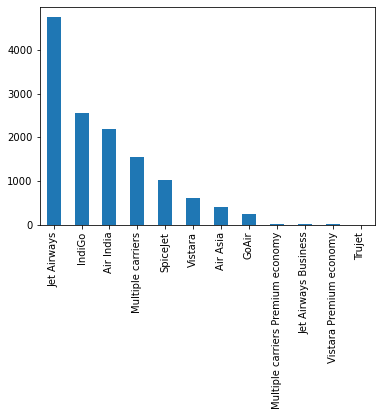

In [10]:
df.Airline.value_counts().plot.bar()

In [11]:
df.Date_of_Journey.value_counts().head(1),df.Date_of_Journey.value_counts().tail(1)

(18/05/2019    633
 Name: Date_of_Journey, dtype: int64,
 1/03/2019    59
 Name: Date_of_Journey, dtype: int64)

<AxesSubplot:>

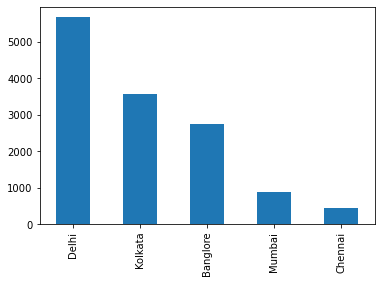

In [12]:
df.Source.value_counts().plot(kind='bar')

In [13]:
df.Destination.value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

<AxesSubplot:>

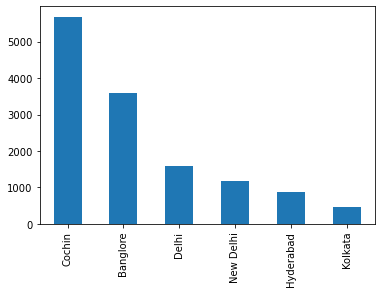

In [14]:
df.Destination.value_counts().plot.bar()

In [15]:
df.Route.value_counts().head(3)

DEL → BOM → COK    3000
BLR → DEL          1941
CCU → BOM → BLR    1232
Name: Route, dtype: int64

In [16]:
df.Dep_Time.value_counts().head(),df.Arrival_Time.value_counts().head()

(18:55    288
 17:00    275
 10:00    265
 07:05    240
 07:10    239
 Name: Dep_Time, dtype: int64,
 19:00    536
 21:00    466
 19:15    434
 16:10    185
 12:35    159
 Name: Arrival_Time, dtype: int64)

In [17]:
df.Duration.value_counts()

2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
          ... 
29h 10m      1
32h 55m      1
31h 30m      1
35h 20m      1
32h 25m      1
Name: Duration, Length: 374, dtype: int64

In [18]:
df.Total_Stops.value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

<AxesSubplot:>

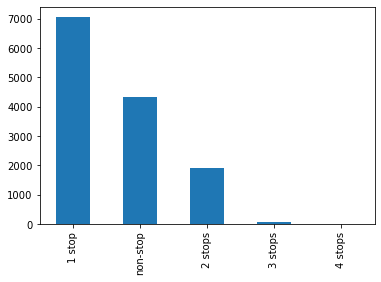

In [19]:
df.Total_Stops.value_counts().plot.bar()

In [20]:
df.Additional_Info.value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

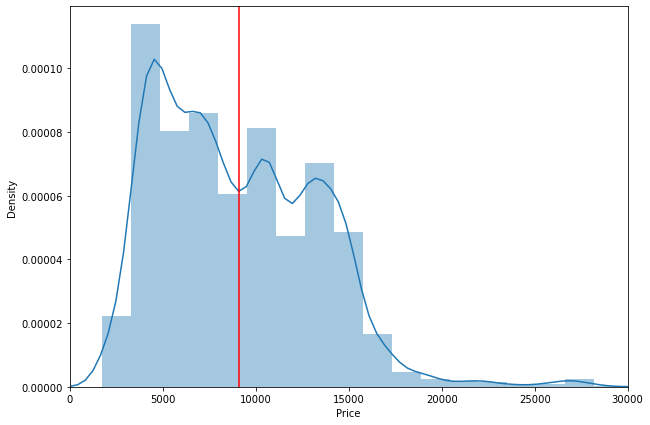

In [21]:
plt.figure(figsize=(10,7))
mean=df.Price.mean()
sns.distplot(df.Price)
plt.xlim(0,30000)
# for mean line we will use axvline here
plt.axvline(mean,color='red')

## Inferences-

* Jet Airways has maximum number of flights

* 18 may has maximum number of flights where as 1st march has minimum number of flights

* Delhi has maximum number of flights i.e. 5682

* Maximum number of flights touched down at cochin

*  Delhi to cochin has maximum number of flights

* There are 3000 flights from delhi which are going to cochin via bombay 

* Evening has more number of flights 

* Maximum flights are of small duration so we can say non stop or one stop flights are more

* Average of price is somewhere around 9000

##  Bivariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

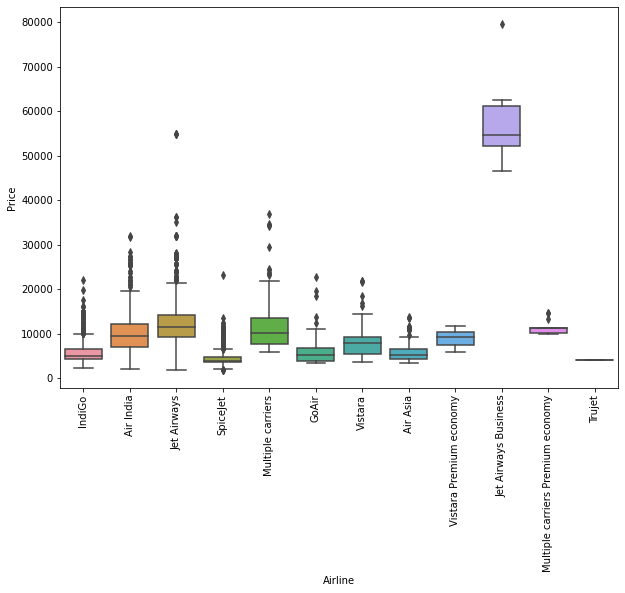

In [22]:
# Cat vs Num
plt.figure(figsize=[10,7])
sns.boxplot(x='Airline',y='Price',data=df)
plt.xticks(rotation=90)

In [23]:
cols= df.columns
cols

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [24]:
num=df._get_numeric_data().columns
num

Index(['Price'], dtype='object')

In [25]:
obj=list(set(cols)-set(num))
obj

['Source',
 'Date_of_Journey',
 'Total_Stops',
 'Destination',
 'Additional_Info',
 'Airline',
 'Route',
 'Duration',
 'Arrival_Time',
 'Dep_Time']

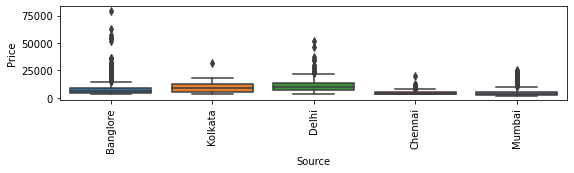

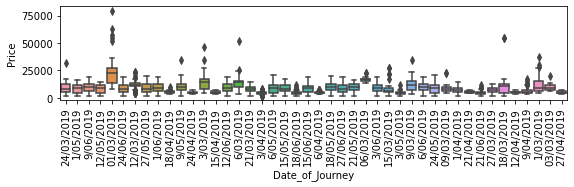

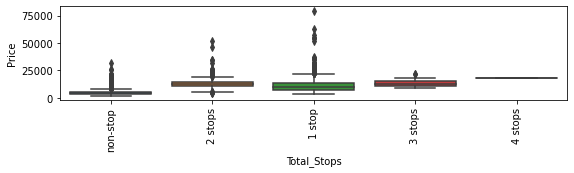

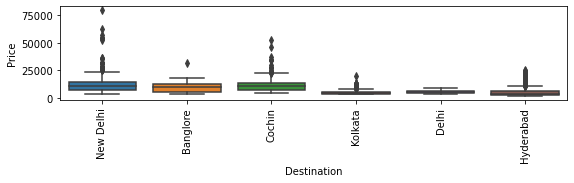

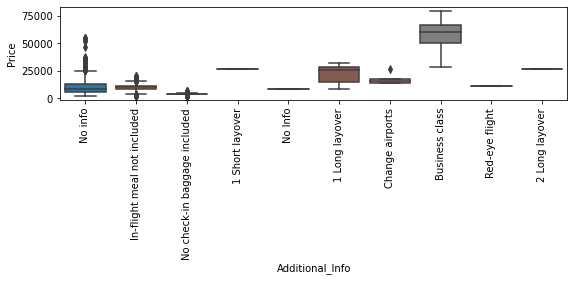

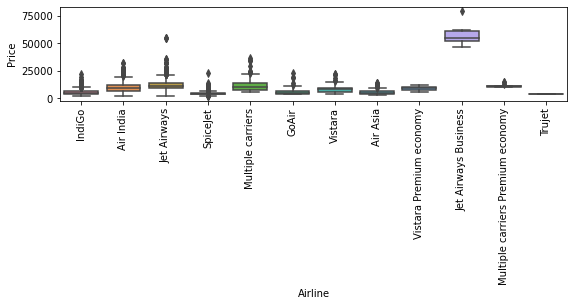

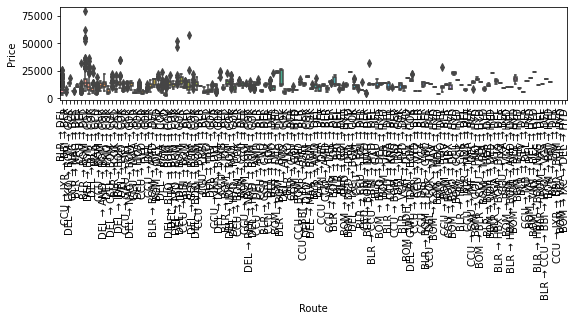

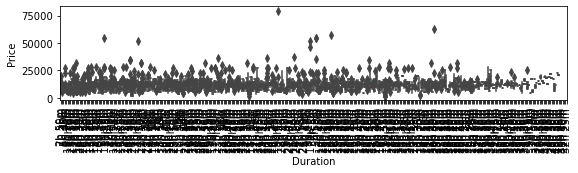

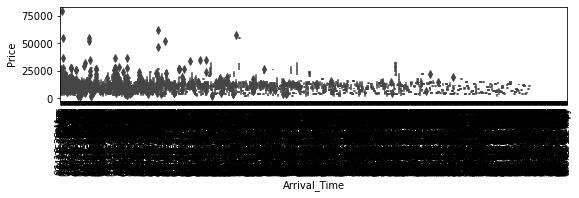

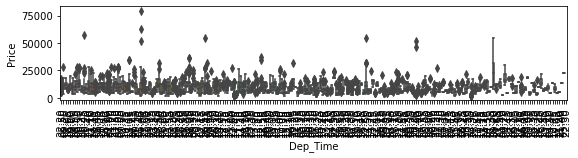

In [26]:
plt.rcParams['figure.figsize']=[20,10]
n_rows=5
n_cols=2
counter=1
for i in obj:
    
    plt.subplot(n_rows,n_cols,counter)
    sns.boxplot(x=i,y='Price',data=df)
    plt.xticks(rotation=90)
    plt.show()
    counter+=1

## Inferences

* Business class has high price
* price of flights was high on 01/03/2019
* Jet Airways business is costly one
* price is high for the flights taking off from banglore

 * we can also confirm our inferences from statistical tests.

## Feature Engineering

In [27]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0


## Missing Values

In [28]:
df.isnull().sum()


Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

## Dropping Route

* we did not get any inference using route so lets drrop it.

In [29]:
df.drop('Route',axis=1,inplace=True)

In [30]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302.0


### Total Stops

In [31]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [32]:
df.Total_Stops.isnull().sum()



1

* only one entry is null lets fill it with 1 as we have max number of flight for 1 stop

In [33]:
df['Total_Stops']=df.Total_Stops.fillna(1)

### Encoding of total stops


In [34]:
df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [35]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info,13302.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13354 non-null  int64  
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.6+ MB


### Duration 

In [37]:
df['Duration'].str.split(' ').str[0].str.split('h').str[0]

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration, Length: 13354, dtype: object

In [38]:
df['D_h']=df['Duration'].str.split(' ').str[0].str.split('h').str[0] # duration hours

In [39]:
df['D_m']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]  # duration minutes


* Now D_m have some null values because we have some entries with full hour only like 2h ,3h etc

In [40]:

df['D_m']=df['D_m'].fillna(0)

In [41]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,D_h,D_m
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,2,50
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662.0,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,No info,13882.0,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218.0,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info,13302.0,4,45


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13354 non-null  int64  
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  D_h              13354 non-null  object 
 11  D_m              13354 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.8+ MB


In [43]:
df[df['Duration']=='5m']
#  we have these two enteries so lets deal with these

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,D_h,D_m
6474,Air India,6/03/2019,Mumbai,Hyderabad,16:50,16:55,5m,2,No info,17327.0,5m,0
2660,Air India,12/03/2019,Mumbai,Hyderabad,16:50,16:55,5m,2,No info,NaN,5m,0


### Dropping these two rows

In [44]:
df.drop(6474,axis=0,inplace=True)
df.drop(2660,axis=0,inplace=True)

### change data type

In [45]:

df['D_m']=df['D_m'].astype('int')
df['D_h']=df['D_h'].astype('int')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Date_of_Journey  13351 non-null  object 
 2   Source           13351 non-null  object 
 3   Destination      13351 non-null  object 
 4   Dep_Time         13351 non-null  object 
 5   Arrival_Time     13351 non-null  object 
 6   Duration         13351 non-null  object 
 7   Total_Stops      13351 non-null  int64  
 8   Additional_Info  13351 non-null  object 
 9   Price            10681 non-null  float64
 10  D_h              13351 non-null  int32  
 11  D_m              13351 non-null  int32  
dtypes: float64(1), int32(2), int64(1), object(8)
memory usage: 1.2+ MB


### Converting Duration into only minutes

In [47]:

df['Duration(in mins)']=(df['D_h']*60)+(df['D_m'])

In [48]:
df.head()



,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,D_h,D_m,Duration(in mins)
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,2,50,170
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662.0,7,25,445
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,No info,13882.0,19,0,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218.0,5,25,325
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info,13302.0,4,45,285


### Now lets drop three columns named duration,d_h,d_m

In [49]:
df.drop(["Duration",'D_h','D_m'],axis=1,inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13351 non-null  object 
 1   Date_of_Journey    13351 non-null  object 
 2   Source             13351 non-null  object 
 3   Destination        13351 non-null  object 
 4   Dep_Time           13351 non-null  object 
 5   Arrival_Time       13351 non-null  object 
 6   Total_Stops        13351 non-null  int64  
 7   Additional_Info    13351 non-null  object 
 8   Price              10681 non-null  float64
 9   Duration(in mins)  13351 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 1.1+ MB


### Date of journey

In [51]:

df['Date_of_Journey'].str.split('/').str[0]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13351, dtype: object

### New Features from date of journey

In [52]:

df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [53]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration(in mins),Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,0,No info,3897.0,170,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2,No info,7662.0,445,1,05,2019


In [54]:
df['Year'].unique()

# as whole data belong to 2019 lets drop this column also

array(['2019'], dtype=object)

### Dropping Date of journey and Year

In [55]:
df.drop('Year',axis=1,inplace=True)

df.drop('Date_of_Journey',axis=1,inplace=True)

In [56]:
df.head(1)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration(in mins),Date,Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,0,No info,3897.0,170,24,03


In [57]:
len(df['Additional_Info']),df['Additional_Info'].value_counts()

(13351,
 No info                         10490
 In-flight meal not included      2426
 No check-in baggage included      396
 1 Long layover                     20
 Change airports                     8
 Business class                      5
 No Info                             3
 1 Short layover                     1
 Red-eye flight                      1
 2 Long layover                      1
 Name: Additional_Info, dtype: int64)

In [58]:
# percentage of no info data
10490/len(df['Additional_Info'])

#almost 78.5 percent has no info

0.7857089356602501

In [59]:
df['Airline'].value_counts()

Jet Airways                          4745
IndiGo                               2564
Air India                            2190
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [60]:
df[df['Airline']=='Trujet']

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration(in mins),Date,Month
2878,Trujet,Mumbai,Hyderabad,13:05,16:20,1,No info,4140.0,195,6,03


### we have very small data for last some airlines  so lets drop them

In [61]:
#dropping Trujet

df.drop(2878,axis=0,inplace=True)

In [62]:
# to delete multiple value at a time
df=df.set_index('Airline') 

In [63]:
df.drop('Multiple carriers Premium economy',axis=0,inplace=True)

df.drop('Jet Airways Business',axis=0,inplace=True)

df.drop('Vistara Premium economy',axis=0,inplace=True)

In [64]:
# resetting the index again
df=df.reset_index()

In [65]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia'], dtype=object)

In [66]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration(in mins),Date,Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,0,No info,3897.0,170,24,03
1,Air India,Kolkata,Banglore,05:50,13:15,2,No info,7662.0,445,1,05
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2,No info,13882.0,1140,9,06
3,IndiGo,Kolkata,Banglore,18:05,23:30,1,No info,6218.0,325,12,05
4,IndiGo,Banglore,New Delhi,16:50,21:35,1,No info,13302.0,285,01,03


 * Picking only time from arrival time
 

In [67]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0] 

In [68]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration(in mins),Date,Month
0,IndiGo,Banglore,New Delhi,22:20,01:10,0,No info,3897.0,170,24,03
1,Air India,Kolkata,Banglore,05:50,13:15,2,No info,7662.0,445,1,05
2,Jet Airways,Delhi,Cochin,09:25,04:25,2,No info,13882.0,1140,9,06
3,IndiGo,Kolkata,Banglore,18:05,23:30,1,No info,6218.0,325,12,05
4,IndiGo,Banglore,New Delhi,16:50,21:35,1,No info,13302.0,285,01,03


## Now change format of dep_time and Arrival time 

In [69]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])

In [70]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13321 entries, 0 to 13320
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Airline            13321 non-null  object        
 1   Source             13321 non-null  object        
 2   Destination        13321 non-null  object        
 3   Dep_Time           13321 non-null  datetime64[ns]
 4   Arrival_Time       13321 non-null  datetime64[ns]
 5   Total_Stops        13321 non-null  int64         
 6   Additional_Info    13321 non-null  object        
 7   Price              10658 non-null  float64       
 8   Duration(in mins)  13321 non-null  int32         
 9   Date               13321 non-null  object        
 10  Month              13321 non-null  object        
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(6)
memory usage: 1.1+ MB


In [72]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration(in mins),Date,Month
0,IndiGo,Banglore,New Delhi,2022-09-14 22:20:00,2022-09-14 01:10:00,0,No info,3897.0,170,24,03
1,Air India,Kolkata,Banglore,2022-09-14 05:50:00,2022-09-14 13:15:00,2,No info,7662.0,445,1,05
2,Jet Airways,Delhi,Cochin,2022-09-14 09:25:00,2022-09-14 04:25:00,2,No info,13882.0,1140,9,06
3,IndiGo,Kolkata,Banglore,2022-09-14 18:05:00,2022-09-14 23:30:00,1,No info,6218.0,325,12,05
4,IndiGo,Banglore,New Delhi,2022-09-14 16:50:00,2022-09-14 21:35:00,1,No info,13302.0,285,01,03


### New features from Dep time and Arrival time

In [73]:

df['Dep_time']=df['Dep_Time'].dt.hour

df['Arr_time']=df['Arrival_Time'].dt.hour

* now lets drop dep_time and Arrival_time

In [74]:

df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

### function for time format labelling

In [75]:

def dep_time(hour):
    if 4<=hour<8:
        return 'Early Morning'
    elif 8<=hour<13:
        return 'Morning'
    elif 13<=hour<16:
        return 'Afternoon'
    elif 16<=hour<20:
        return 'Evening'
    elif 20<=hour<23:
        return 'Night'
    else:
        return 'Late Night'

In [76]:
#apply labelling function to both departure and arrival time
df['Dep_time']=df['Dep_time'].apply(dep_time)

In [77]:
df['Arr_time']=df['Arr_time'].apply(dep_time)

In [78]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Duration(in mins),Date,Month,Dep_time,Arr_time
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,170,24,03,Night,Late Night
1,Air India,Kolkata,Banglore,2,No info,7662.0,445,1,05,Early Morning,Afternoon
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,1140,9,06,Morning,Early Morning
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,325,12,05,Evening,Late Night
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,285,01,03,Evening,Night


## Binning of Date

In [79]:

df['Date'].unique()
lst=['1','3','01','03','6','06']
lst1=['9','09','12','15','18']


In [80]:
def date_m(date):
    if date in lst:
        return 'Early Month'
    
    elif date in lst1:
        return 'Mid Month'
    
    else:
        return 'End Month'

In [81]:
df['Date']=df['Date'].apply(date_m)

In [82]:
df['Month'].unique()

array(['03', '05', '06', '04'], dtype=object)

In [83]:
#after binning store data in  same name
df['Month']=df['Month'].replace({"03":'March','05':'May','04':'April','06':'June'},inplace=True)

In [84]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Duration(in mins),Date,Month,Dep_time,Arr_time
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,170,End Month,None,Night,Late Night
1,Air India,Kolkata,Banglore,2,No info,7662.0,445,Early Month,None,Early Morning,Afternoon
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,1140,Mid Month,None,Morning,Early Morning
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,325,Mid Month,None,Evening,Late Night
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,285,Early Month,None,Evening,Night


### n-1 DummyEncoding

In [85]:

df_new=pd.get_dummies(df,drop_first=True)

In [86]:
df_new.head()

,Total_Stops,Price,Duration(in mins),Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,...,Dep_time_Early Morning,Dep_time_Evening,Dep_time_Late Night,Dep_time_Morning,Dep_time_Night,Arr_time_Early Morning,Arr_time_Evening,Arr_time_Late Night,Arr_time_Morning,Arr_time_Night
0,0,3897.0,170,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2,7662.0,445,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,13882.0,1140,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,6218.0,325,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,13302.0,285,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


### Splitting data into Test And Train

In [87]:

train=df_new.iloc[0:10658,]
test=df_new.iloc[10658:,]


### For validation We will Split Our Train data into test and train 

In [88]:
X=train.drop('Price',axis=1)

In [89]:
y=train['Price']

In [90]:

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.25)

## OLS Model

In [91]:
X_train['const']=1

In [92]:
#linear OLS model
model=sm.OLS(y_train,X_train).fit()

In [93]:
#model summary print
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     479.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:31:22   Log-Likelihood:                -74069.
No. Observations:                7993   AIC:                         1.482e+05
Df Residuals:                    7959   BIC:                         1.484e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Total_Stops                                   2481.8870     77.705     31.940      0.000    2329.565    2634.209
Duration(in mins)                                0.2503      0.091      2.753      0.006       0.072       0.429
Airline_Air India                             1574.3882    194.260      8.105      0.000    1193.587    1955.189
Airline_GoAir                                  -31.3635    274.019     -0.114      0.909    -568.512     505.785
Airline_IndiGo                                 259.3159    183.788      1.411      0.158    -100.957     619.589
Airline_Jet Airways                           5958.2819    190.242     31.320      0.000    5585.359    6331.205
Airline_Multiple carriers                     3879.6361    201.151     19.287      0.000    3485.328    4273.944
Airline_SpiceJet                              -130.7813    217.892     -0.600      0.548    -557.906     296.344
Airline_Vistara                               2259.5145    222.213     10.168      0.000    1823.919    2695.110
Source_Chennai                                1129.9308     96.998     11.649      0.000     939.789    1320.073
Source_Delhi                                  1221.2880     72.764     16.784      0.000    1078.652    1363.924
Source_Kolkata                                2320.2427    137.470     16.878      0.000    2050.765    2589.721
Source_Mumbai                                  358.0306     83.183      4.304      0.000     194.970     521.091
Destination_Cochin                            1221.2880     72.764     16.784      0.000    1078.652    1363.924
Destination_Delhi                             1313.8674    146.375      8.976      0.000    1026.934    1600.801
Destination_Hyderabad                          358.0306     83.183      4.304      0.000     194.970     521.091
Destination_Kolkata                           1129.9308     96.998     11.649      0.000     939.789    1320.073
Destination_New Delhi                         4315.8588    140.447     30.730      0.000    4040.547    4591.171
Additional_Info_1 Short layover               5205.5223   2643.460      1.969      0.049      23.648    1.04e+04
Additional_Info_2 Long layover                1.114e-11   2.89e-12      3.859      0.000    5.48e-12    1.68e-11
Additional_Info_Business class                5172.6547   2641.758      1.958      0.050      -5.883    1.04e+04
Additional_Info_Change airports              -3500.2673   1308.930     -2.674      0.008   -6066.114    -934.421
Additional_Info_In-flight meal not included    -1.1e+04    635.140    -17.312      0.000   -1.22e+04   -9750.470
Additional_Info_No Info                      -9218.2023   2642.895     -3.488      0.000   -1.44e+04   -4037.436
Additional_Info_No check-in bagg

In [94]:
X_test['const']=1

In [95]:
#predicted value of y
y_predicted=model.predict(X_test)

In [96]:
#RMSE for train(75% of train data)
RMSE_train=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

In [97]:
#RMSE for test(25% of test data)
RMSE_test=np.sqrt(mean_squared_error(y_test,y_predicted))

In [98]:
#print RMSE of both data
RMSE_train,RMSE_test

(2559.972644162151, 2592.7332026974914)

In [99]:
#R_square in data
R_square=model.rsquared

In [100]:
#lets make a function to find out adjusted r square also
def adj(r,n,k):
    return 1-((1-r)*(n-1))/(n-k-1)

In [101]:
R_adjust=adj(R_square,X_train.shape[0],X_train.shape[1])
R_adjust

0.663616616192245

* will make a Pandas Data Frame and in last we will select our best model

In [102]:
#adding data in dataframe compare,so that in the end we can compare and choose model
compare=pd.DataFrame({'model_name':['linear_regression'],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test],'R_square':[R_square],'R_adjust':[R_adjust]})

## Decision Tree Model

In [103]:
dct=DecisionTreeRegressor(random_state=10,max_depth=4)

X_train=X_train.drop('const',axis=1) # remove constant added for ols model

X_test=X_test.drop('const',axis=1) # remove constant added for ols model

model_dct=dct.fit(X_train,y_train)  #decision tree fitting

R_square_dct=model_dct.score(X_train,y_train)  #R square dct

RMSE_dct_train=np.sqrt(mean_squared_error(y_train,model_dct.predict(X_train)))  #RMSE train

RMSE_dct_test=np.sqrt(mean_squared_error(y_test,model_dct.predict(X_test)))  #RMSE train

R_adjust_dct=adj(R_square_dct,X_train.shape[0],X_train.shape[1])  # adjusted R square
R_adjust_dct

0.6601643330641264

In [104]:
#appending values in data frame
compare.loc[len(compare.index)]=['Decision Tree',RMSE_dct_train,RMSE_dct_test,R_square_dct,R_adjust_dct]   # appending into dataframe

## Random Forest Model

In [105]:
rfr=RandomForestRegressor(n_estimators=500,max_depth=4) 
model_rfr=rfr.fit(X_train,y_train) #random forest fitting

R_square_rfr=model_rfr.score(X_train,y_train)  # r_square

RMSE_rfr_train=np.sqrt(mean_squared_error(y_train,model_rfr.predict(X_train))) #RMSE train

RMSE_rfr_test=np.sqrt(mean_squared_error(y_test,model_rfr.predict(X_test)))  # RMSE test

# adjusted r square
R_adjust_rfr=adj(R_square_rfr,X_train.shape[0],X_train.shape[1])
R_adjust_rfr

0.6670201392436887

In [106]:
#appending into dataframe
compare.loc[len(compare.index)]=['Random Forest(n=500)',RMSE_rfr_train,RMSE_rfr_test,R_square_rfr,R_adjust_rfr] #appending into dataframe

In [107]:
compare

,model_name,RMSE_train,RMSE_test,R_square,R_adjust
0,linear_regression,2559.972644,2592.733203,0.665300,0.663617
1,Decision Tree,2573.237320,2561.142792,0.661823,0.660164
2,Random Forest(n=500),2547.148975,2519.040988,0.668645,0.667020


## Parameter Tunning

In [108]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [109]:
l=Lasso()
l.fit(X_train,y_train)

r2_lasso=l.score(X_train,y_train)
r2_lasso

r2_adjust_lasso=adj(r2_lasso,X_train.shape[0],X_train.shape[1])
r2_adjust_lasso

RMSE_train_lasso=np.sqrt(mean_squared_error(y_train,l.predict(X_train)))

RMSE_test_lasso=np.sqrt(mean_squared_error(y_test,l.predict(X_test)))

In [110]:
#appending in dataframe
compare.loc[len(compare.index)]=['Lasso',RMSE_train_lasso,RMSE_test_lasso,r2_lasso,r2_adjust_lasso]

In [111]:
compare

,model_name,RMSE_train,RMSE_test,R_square,R_adjust
0,linear_regression,2559.972644,2592.733203,0.665300,0.663617
1,Decision Tree,2573.237320,2561.142792,0.661823,0.660164
2,Random Forest(n=500),2547.148975,2519.040988,0.668645,0.667020
3,Lasso,2565.082275,2606.040933,0.663963,0.662315


In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
est=Lasso()

In [114]:
params=[{'alpha':[0.001,0.01,0.1,1,10,100]}]

GSV=GridSearchCV(estimator=est,param_grid=params)


In [115]:
#best params we are getting is alpha =1 

In [116]:
#we have already made our model using alpha=1,so need to rebuild

#lets move to Ridge

In [117]:
r=Ridge()
r.fit(X_train,y_train)

Ridge()

In [118]:
# r square
r2_ridge=r.score(X_train,y_train)

In [119]:
# adjusted r square
r2_adj_ridge=adj(r2_ridge,X_train.shape[0],X_train.shape[1])

In [120]:
#RMSE trai
RMSE_train_ridge=np.sqrt(mean_squared_error(y_train,r.predict(X_train)))

In [121]:
#RMSE test
RMSE_test_ridge=np.sqrt(mean_squared_error(y_test,r.predict(X_test)))

In [122]:
#appending
compare.loc[len(compare.index)]=['Ridge',RMSE_train_ridge,RMSE_test_ridge,r2_ridge,r2_adj_ridge]

In [123]:
compare

,model_name,RMSE_train,RMSE_test,R_square,R_adjust
0,linear_regression,2559.972644,2592.733203,0.665300,0.663617
1,Decision Tree,2573.237320,2561.142792,0.661823,0.660164
2,Random Forest(n=500),2547.148975,2519.040988,0.668645,0.667020
3,Lasso,2565.082275,2606.040933,0.663963,0.662315
4,Ridge,2561.603511,2597.357811,0.664874,0.663230


## Parameter Tunning

In [124]:

GSV_tuned=GridSearchCV(estimator=r,param_grid=params)

In [125]:
GSV_tuned.fit(X_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}])

In [126]:
GSV_tuned.best_params_

{'alpha': 0.1}

In [127]:
#lets use 0.1 alpha 

In [128]:
r_tuned=Ridge(0.1)

In [129]:
r_tuned.fit(X_train,y_train)

Ridge(alpha=0.1)

In [130]:

# r square
r2_ridge_tuned=r_tuned.score(X_train,y_train)

In [131]:
#adjusted r square
r2_adj_ridge_tuned=adj(r2_ridge,X_train.shape[0],X_train.shape[1])

In [132]:
#train RMSE
RMSE_train_ridge_tuned=np.sqrt(mean_squared_error(y_train,r_tuned.predict(X_train)))

In [133]:
#RMSE test
RMSE_test_ridge_tuned=np.sqrt(mean_squared_error(y_test,r_tuned.predict(X_test)))

In [134]:
#appending in dataframe
compare.loc[len(compare.index)]=['Ridge_Tuned',RMSE_train_ridge_tuned,RMSE_test_ridge_tuned,r2_ridge_tuned,r2_adj_ridge_tuned]

In [135]:
compare


,model_name,RMSE_train,RMSE_test,R_square,R_adjust
0,linear_regression,2559.972644,2592.733203,0.665300,0.663617
1,Decision Tree,2573.237320,2561.142792,0.661823,0.660164
2,Random Forest(n=500),2547.148975,2519.040988,0.668645,0.667020
3,Lasso,2565.082275,2606.040933,0.663963,0.662315
4,Ridge,2561.603511,2597.357811,0.664874,0.663230
5,Ridge_Tuned,2560.012762,2593.099172,0.665290,0.663230


## GB BOOST

In [136]:

from sklearn.ensemble import GradientBoostingRegressor

In [137]:
GB=GradientBoostingRegressor()

In [138]:
model_gb=GB.fit(X_train,y_train)

In [139]:
r2_gb=model_gb.score(X_train,y_train)
r2_gb

0.7479506819254429

In [140]:
r2_adj_gb=adj(r2_gb,X_train.shape[0],X_train.shape[1])
r2_adj_gb

0.7467146799884496

In [141]:
RMSE_gb_train=np.sqrt(mean_squared_error(y_train,model_gb.predict(X_train)))

In [142]:
RMSE_gb_test=np.sqrt(mean_squared_error(y_test,model_gb.predict(X_test)))

In [143]:
RMSE_gb_train,RMSE_gb_test

(2221.520740692705, 2241.1609493966225)

In [144]:
#appending in dataframe
compare.loc[len(compare.index)]=['GB_Normal',RMSE_gb_train,RMSE_gb_test,r2_gb,r2_adj_gb]

In [145]:
compare

,model_name,RMSE_train,RMSE_test,R_square,R_adjust
0,linear_regression,2559.972644,2592.733203,0.665300,0.663617
1,Decision Tree,2573.237320,2561.142792,0.661823,0.660164
2,Random Forest(n=500),2547.148975,2519.040988,0.668645,0.667020
3,Lasso,2565.082275,2606.040933,0.663963,0.662315
4,Ridge,2561.603511,2597.357811,0.664874,0.663230
5,Ridge_Tuned,2560.012762,2593.099172,0.665290,0.663230
6,GB_Normal,2221.520741,2241.160949,0.747951,0.746715


## CAT BOOST

In [146]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [147]:
from catboost import CatBoostRegressor

In [148]:
CBR=CatBoostRegressor()

In [149]:
model_CBR=CBR.fit(X_train,y_train)

Learning rate set to 0.05686
0:	learn: 4276.4096014	total: 150ms	remaining: 2m 29s
1:	learn: 4136.1373788	total: 155ms	remaining: 1m 17s
2:	learn: 4004.7272739	total: 161ms	remaining: 53.4s
3:	learn: 3880.2857419	total: 166ms	remaining: 41.3s
4:	learn: 3760.7081533	total: 171ms	remaining: 34s
5:	learn: 3654.9726451	total: 176ms	remaining: 29.2s
6:	learn: 3557.2065717	total: 185ms	remaining: 26.2s
7:	learn: 3465.4116078	total: 193ms	remaining: 23.9s
8:	learn: 3381.5301322	total: 200ms	remaining: 22s
9:	learn: 3301.2161296	total: 208ms	remaining: 20.6s
10:	learn: 3228.5571912	total: 214ms	remaining: 19.2s
11:	learn: 3159.0412789	total: 220ms	remaining: 18.1s
12:	learn: 3100.9516096	total: 225ms	remaining: 17.1s
13:	learn: 3042.5698520	total: 230ms	remaining: 16.2s
14:	learn: 2991.8724886	total: 236ms	remaining: 15.5s
15:	learn: 2943.6929794	total: 241ms	remaining: 14.8s
16:	learn: 2899.8654264	total: 246ms	remaining: 14.2s
17:	learn: 2860.7844335	total: 251ms	remaining: 13.7s
18:	learn: 

174:	learn: 2103.4650280	total: 1.1s	remaining: 5.19s
175:	learn: 2102.3714284	total: 1.11s	remaining: 5.19s
176:	learn: 2101.5608485	total: 1.11s	remaining: 5.17s
177:	learn: 2100.5180466	total: 1.12s	remaining: 5.17s
178:	learn: 2099.4426990	total: 1.13s	remaining: 5.17s
179:	learn: 2098.9534374	total: 1.13s	remaining: 5.15s
180:	learn: 2098.4267328	total: 1.14s	remaining: 5.15s
181:	learn: 2097.0269475	total: 1.14s	remaining: 5.14s
182:	learn: 2096.9997161	total: 1.15s	remaining: 5.12s
183:	learn: 2095.9890987	total: 1.15s	remaining: 5.1s
184:	learn: 2095.9622415	total: 1.15s	remaining: 5.09s
185:	learn: 2094.1934278	total: 1.16s	remaining: 5.07s
186:	learn: 2093.4684649	total: 1.16s	remaining: 5.06s
187:	learn: 2092.1260570	total: 1.17s	remaining: 5.05s
188:	learn: 2090.7351335	total: 1.17s	remaining: 5.03s
189:	learn: 2089.6621411	total: 1.18s	remaining: 5.02s
190:	learn: 2089.0566531	total: 1.18s	remaining: 5s
191:	learn: 2088.1935790	total: 1.19s	remaining: 4.99s
192:	learn: 208

331:	learn: 1979.2444313	total: 1.83s	remaining: 3.67s
332:	learn: 1978.6243429	total: 1.83s	remaining: 3.67s
333:	learn: 1978.2804449	total: 1.84s	remaining: 3.66s
334:	learn: 1977.7404651	total: 1.84s	remaining: 3.66s
335:	learn: 1976.8460045	total: 1.85s	remaining: 3.65s
336:	learn: 1976.1713892	total: 1.85s	remaining: 3.64s
337:	learn: 1975.6763196	total: 1.86s	remaining: 3.64s
338:	learn: 1975.2632230	total: 1.86s	remaining: 3.63s
339:	learn: 1974.7955338	total: 1.87s	remaining: 3.63s
340:	learn: 1974.6220058	total: 1.87s	remaining: 3.62s
341:	learn: 1973.0401840	total: 1.88s	remaining: 3.61s
342:	learn: 1972.8801282	total: 1.88s	remaining: 3.6s
343:	learn: 1971.8249738	total: 1.89s	remaining: 3.6s
344:	learn: 1971.2362169	total: 1.89s	remaining: 3.59s
345:	learn: 1970.5499201	total: 1.9s	remaining: 3.58s
346:	learn: 1969.9337643	total: 1.9s	remaining: 3.58s
347:	learn: 1969.6635485	total: 1.91s	remaining: 3.57s
348:	learn: 1969.0569053	total: 1.91s	remaining: 3.56s
349:	learn: 19

487:	learn: 1890.7532305	total: 2.58s	remaining: 2.71s
488:	learn: 1889.2790052	total: 2.59s	remaining: 2.71s
489:	learn: 1888.8368106	total: 2.6s	remaining: 2.71s
490:	learn: 1888.5598031	total: 2.61s	remaining: 2.7s
491:	learn: 1887.6342870	total: 2.61s	remaining: 2.7s
492:	learn: 1886.6905553	total: 2.62s	remaining: 2.69s
493:	learn: 1886.2908593	total: 2.62s	remaining: 2.69s
494:	learn: 1886.0104117	total: 2.63s	remaining: 2.68s
495:	learn: 1885.6876479	total: 2.63s	remaining: 2.67s
496:	learn: 1885.1731398	total: 2.64s	remaining: 2.67s
497:	learn: 1884.9231446	total: 2.64s	remaining: 2.66s
498:	learn: 1883.7637687	total: 2.65s	remaining: 2.66s
499:	learn: 1883.4239493	total: 2.65s	remaining: 2.65s
500:	learn: 1883.0547335	total: 2.65s	remaining: 2.64s
501:	learn: 1882.6857803	total: 2.66s	remaining: 2.64s
502:	learn: 1882.1717430	total: 2.66s	remaining: 2.63s
503:	learn: 1881.1883613	total: 2.67s	remaining: 2.63s
504:	learn: 1880.4894258	total: 2.67s	remaining: 2.62s
505:	learn: 1

639:	learn: 1819.4894928	total: 3.3s	remaining: 1.85s
640:	learn: 1819.1994766	total: 3.3s	remaining: 1.85s
641:	learn: 1818.8346791	total: 3.31s	remaining: 1.84s
642:	learn: 1818.5356341	total: 3.31s	remaining: 1.84s
643:	learn: 1818.1805422	total: 3.32s	remaining: 1.83s
644:	learn: 1817.5609035	total: 3.33s	remaining: 1.83s
645:	learn: 1816.9239867	total: 3.33s	remaining: 1.82s
646:	learn: 1816.4141671	total: 3.34s	remaining: 1.82s
647:	learn: 1816.0193639	total: 3.34s	remaining: 1.81s
648:	learn: 1815.8978589	total: 3.35s	remaining: 1.81s
649:	learn: 1815.6158177	total: 3.35s	remaining: 1.8s
650:	learn: 1815.2692159	total: 3.35s	remaining: 1.8s
651:	learn: 1815.0874661	total: 3.36s	remaining: 1.79s
652:	learn: 1814.6267323	total: 3.36s	remaining: 1.79s
653:	learn: 1814.0838396	total: 3.37s	remaining: 1.78s
654:	learn: 1813.7591524	total: 3.37s	remaining: 1.78s
655:	learn: 1813.4511286	total: 3.38s	remaining: 1.77s
656:	learn: 1813.0736674	total: 3.38s	remaining: 1.76s
657:	learn: 18

789:	learn: 1767.3020263	total: 4s	remaining: 1.06s
790:	learn: 1767.0318662	total: 4s	remaining: 1.06s
791:	learn: 1766.5508783	total: 4.01s	remaining: 1.05s
792:	learn: 1766.4172511	total: 4.01s	remaining: 1.05s
793:	learn: 1766.0296543	total: 4.02s	remaining: 1.04s
794:	learn: 1765.6024599	total: 4.02s	remaining: 1.04s
795:	learn: 1765.0651610	total: 4.03s	remaining: 1.03s
796:	learn: 1764.9438455	total: 4.03s	remaining: 1.03s
797:	learn: 1764.3040455	total: 4.04s	remaining: 1.02s
798:	learn: 1764.0324751	total: 4.04s	remaining: 1.02s
799:	learn: 1763.7265302	total: 4.05s	remaining: 1.01s
800:	learn: 1763.4941963	total: 4.05s	remaining: 1.01s
801:	learn: 1763.1297963	total: 4.06s	remaining: 1s
802:	learn: 1762.7618873	total: 4.06s	remaining: 996ms
803:	learn: 1762.5730796	total: 4.07s	remaining: 991ms
804:	learn: 1762.4749732	total: 4.07s	remaining: 986ms
805:	learn: 1762.2495623	total: 4.07s	remaining: 981ms
806:	learn: 1762.0490898	total: 4.08s	remaining: 976ms
807:	learn: 1761.65

941:	learn: 1719.9697878	total: 4.71s	remaining: 290ms
942:	learn: 1719.6968616	total: 4.72s	remaining: 285ms
943:	learn: 1719.3307468	total: 4.72s	remaining: 280ms
944:	learn: 1719.0354352	total: 4.73s	remaining: 275ms
945:	learn: 1718.9296098	total: 4.73s	remaining: 270ms
946:	learn: 1718.7799017	total: 4.74s	remaining: 265ms
947:	learn: 1718.3621080	total: 4.74s	remaining: 260ms
948:	learn: 1718.1410684	total: 4.75s	remaining: 255ms
949:	learn: 1717.9885718	total: 4.75s	remaining: 250ms
950:	learn: 1717.9580847	total: 4.76s	remaining: 245ms
951:	learn: 1717.8001519	total: 4.76s	remaining: 240ms
952:	learn: 1717.7377875	total: 4.77s	remaining: 235ms
953:	learn: 1716.9012898	total: 4.77s	remaining: 230ms
954:	learn: 1716.6791289	total: 4.78s	remaining: 225ms
955:	learn: 1716.3983360	total: 4.78s	remaining: 220ms
956:	learn: 1716.2154584	total: 4.78s	remaining: 215ms
957:	learn: 1715.9773502	total: 4.79s	remaining: 210ms
958:	learn: 1715.8645338	total: 4.79s	remaining: 205ms
959:	learn

In [150]:
r2_CBR=model_CBR.score(X_train,y_train)

In [151]:
r2_CBR_adj=adj(r2_CBR,X_train.shape[0],X_train.shape[1])

In [152]:
RMSE_train_CBR=np.sqrt(mean_squared_error(y_train,model_CBR.predict(X_train)))

In [153]:
RMSE_test_CBR=np.sqrt(mean_squared_error(y_test,model_CBR.predict(X_test)))

In [154]:
#appending in dataframe
compare.loc[len(compare.index)]=['Cat_Boost',RMSE_train_CBR,RMSE_test_CBR,r2_CBR,r2_CBR_adj]

In [155]:
compare

,model_name,RMSE_train,RMSE_test,R_square,R_adjust
0,linear_regression,2559.972644,2592.733203,0.665300,0.663617
1,Decision Tree,2573.237320,2561.142792,0.661823,0.660164
2,Random Forest(n=500),2547.148975,2519.040988,0.668645,0.667020
3,Lasso,2565.082275,2606.040933,0.663963,0.662315
4,Ridge,2561.603511,2597.357811,0.664874,0.663230
5,Ridge_Tuned,2560.012762,2593.099172,0.665290,0.663230
6,GB_Normal,2221.520741,2241.160949,0.747951,0.746715
7,Cat_Boost,1704.733145,2011.013941,0.851578,0.850850


## LIGHT GBM

In [156]:
pip install lightGBM

Note: you may need to restart the kernel to use updated packages.


In [157]:
from lightgbm import LGBMRegressor

In [158]:
lgbm=LGBMRegressor()

In [159]:
model_lgbm=lgbm.fit(X_train,y_train)

In [160]:
r2_lgbm=model_lgbm.score(X_train,y_train)
r2_lgbm

0.8287691217309847

In [161]:
r2_adj_lgbm=adj(r2_lgbm,X_train.shape[0],X_train.shape[1])

In [162]:
RMSE_train_lgbm=np.sqrt(mean_squared_error(y_train,model_lgbm.predict(X_train)))

In [163]:
RMSE_test_lgbm=np.sqrt(mean_squared_error(y_test,model_lgbm.predict(X_test)))

In [164]:
#appending in dataframe
compare.loc[len(compare.index)]=['LGBM',RMSE_train_lgbm,RMSE_test_lgbm,r2_lgbm,r2_adj_lgbm]

In [165]:
compare

,model_name,RMSE_train,RMSE_test,R_square,R_adjust
0,linear_regression,2559.972644,2592.733203,0.665300,0.663617
1,Decision Tree,2573.237320,2561.142792,0.661823,0.660164
2,Random Forest(n=500),2547.148975,2519.040988,0.668645,0.667020
3,Lasso,2565.082275,2606.040933,0.663963,0.662315
4,Ridge,2561.603511,2597.357811,0.664874,0.663230
5,Ridge_Tuned,2560.012762,2593.099172,0.665290,0.663230
6,GB_Normal,2221.520741,2241.160949,0.747951,0.746715
7,Cat_Boost,1704.733145,2011.013941,0.851578,0.850850
8,LGBM,1831.043454,2037.886811,0.828769,0.827929


## STACKING REGRESSOR

In [166]:
#stacking
from sklearn.ensemble import StackingRegressor

In [167]:
from xgboost import XGBRegressor

In [168]:
base_est=[('XGBOOST',XGBRegressor()),('CATBOOST',CatBoostRegressor()),('LGBM',LGBMRegressor())]

In [169]:
St=StackingRegressor(estimators=base_est)

In [170]:
model_st=St.fit(X_train,y_train)

Learning rate set to 0.05686
0:	learn: 4276.4096014	total: 5.02ms	remaining: 5.01s
1:	learn: 4136.1373788	total: 9.89ms	remaining: 4.94s
2:	learn: 4004.7272739	total: 14.7ms	remaining: 4.89s
3:	learn: 3880.2857419	total: 19.4ms	remaining: 4.82s
4:	learn: 3760.7081533	total: 24.3ms	remaining: 4.84s
5:	learn: 3654.9726451	total: 29.2ms	remaining: 4.83s
6:	learn: 3557.2065717	total: 34.2ms	remaining: 4.86s
7:	learn: 3465.4116078	total: 39.3ms	remaining: 4.87s
8:	learn: 3381.5301322	total: 44.2ms	remaining: 4.87s
9:	learn: 3301.2161296	total: 49ms	remaining: 4.85s
10:	learn: 3228.5571912	total: 53.5ms	remaining: 4.8s
11:	learn: 3159.0412789	total: 58.2ms	remaining: 4.79s
12:	learn: 3100.9516096	total: 62.8ms	remaining: 4.77s
13:	learn: 3042.5698520	total: 67.5ms	remaining: 4.75s
14:	learn: 2991.8724886	total: 72.2ms	remaining: 4.74s
15:	learn: 2943.6929794	total: 76.8ms	remaining: 4.72s
16:	learn: 2899.8654264	total: 81.5ms	remaining: 4.71s
17:	learn: 2860.7844335	total: 86.1ms	remaining: 

186:	learn: 2093.4684649	total: 883ms	remaining: 3.84s
187:	learn: 2092.1260570	total: 888ms	remaining: 3.83s
188:	learn: 2090.7351335	total: 893ms	remaining: 3.83s
189:	learn: 2089.6621411	total: 898ms	remaining: 3.83s
190:	learn: 2089.0566531	total: 903ms	remaining: 3.82s
191:	learn: 2088.1935790	total: 908ms	remaining: 3.82s
192:	learn: 2087.3986126	total: 913ms	remaining: 3.82s
193:	learn: 2087.3738760	total: 917ms	remaining: 3.81s
194:	learn: 2085.3514136	total: 922ms	remaining: 3.81s
195:	learn: 2085.2399166	total: 926ms	remaining: 3.8s
196:	learn: 2084.9397011	total: 931ms	remaining: 3.79s
197:	learn: 2083.4286714	total: 936ms	remaining: 3.79s
198:	learn: 2082.9789691	total: 941ms	remaining: 3.79s
199:	learn: 2082.6016687	total: 945ms	remaining: 3.78s
200:	learn: 2080.6124138	total: 950ms	remaining: 3.77s
201:	learn: 2078.9678932	total: 954ms	remaining: 3.77s
202:	learn: 2078.6594322	total: 959ms	remaining: 3.76s
203:	learn: 2078.0920015	total: 963ms	remaining: 3.76s
204:	learn:

342:	learn: 1972.8801282	total: 1.6s	remaining: 3.07s
343:	learn: 1971.8249738	total: 1.61s	remaining: 3.06s
344:	learn: 1971.2362169	total: 1.61s	remaining: 3.06s
345:	learn: 1970.5499201	total: 1.62s	remaining: 3.06s
346:	learn: 1969.9337643	total: 1.62s	remaining: 3.05s
347:	learn: 1969.6635485	total: 1.63s	remaining: 3.05s
348:	learn: 1969.0569053	total: 1.63s	remaining: 3.05s
349:	learn: 1968.6654674	total: 1.64s	remaining: 3.04s
350:	learn: 1967.6474748	total: 1.64s	remaining: 3.04s
351:	learn: 1966.9766012	total: 1.65s	remaining: 3.04s
352:	learn: 1966.8281325	total: 1.65s	remaining: 3.03s
353:	learn: 1965.9122351	total: 1.66s	remaining: 3.03s
354:	learn: 1965.8164381	total: 1.66s	remaining: 3.02s
355:	learn: 1965.2868367	total: 1.67s	remaining: 3.02s
356:	learn: 1964.7927440	total: 1.67s	remaining: 3.01s
357:	learn: 1963.5936440	total: 1.68s	remaining: 3s
358:	learn: 1962.7973562	total: 1.68s	remaining: 3s
359:	learn: 1962.3078738	total: 1.69s	remaining: 3s
360:	learn: 1961.614

499:	learn: 1883.4239493	total: 2.33s	remaining: 2.33s
500:	learn: 1883.0547335	total: 2.33s	remaining: 2.33s
501:	learn: 1882.6857803	total: 2.34s	remaining: 2.32s
502:	learn: 1882.1717430	total: 2.35s	remaining: 2.32s
503:	learn: 1881.1883613	total: 2.35s	remaining: 2.31s
504:	learn: 1880.4894258	total: 2.35s	remaining: 2.31s
505:	learn: 1879.9043885	total: 2.36s	remaining: 2.31s
506:	learn: 1879.3533113	total: 2.37s	remaining: 2.3s
507:	learn: 1879.1804936	total: 2.37s	remaining: 2.3s
508:	learn: 1878.6870120	total: 2.38s	remaining: 2.29s
509:	learn: 1878.2021764	total: 2.38s	remaining: 2.29s
510:	learn: 1877.8797317	total: 2.39s	remaining: 2.28s
511:	learn: 1877.0711927	total: 2.39s	remaining: 2.28s
512:	learn: 1876.7630829	total: 2.4s	remaining: 2.27s
513:	learn: 1876.2515928	total: 2.4s	remaining: 2.27s
514:	learn: 1875.9325085	total: 2.4s	remaining: 2.27s
515:	learn: 1875.4270744	total: 2.41s	remaining: 2.26s
516:	learn: 1875.3911583	total: 2.41s	remaining: 2.26s
517:	learn: 187

655:	learn: 1813.4511286	total: 3.06s	remaining: 1.6s
656:	learn: 1813.0736674	total: 3.07s	remaining: 1.6s
657:	learn: 1812.6876529	total: 3.07s	remaining: 1.6s
658:	learn: 1812.4522510	total: 3.08s	remaining: 1.59s
659:	learn: 1812.1405767	total: 3.08s	remaining: 1.59s
660:	learn: 1811.4411776	total: 3.09s	remaining: 1.58s
661:	learn: 1810.9122870	total: 3.09s	remaining: 1.58s
662:	learn: 1810.6789448	total: 3.1s	remaining: 1.57s
663:	learn: 1809.9023240	total: 3.1s	remaining: 1.57s
664:	learn: 1809.3469475	total: 3.1s	remaining: 1.56s
665:	learn: 1808.8218144	total: 3.11s	remaining: 1.56s
666:	learn: 1808.6609234	total: 3.12s	remaining: 1.55s
667:	learn: 1808.4415098	total: 3.12s	remaining: 1.55s
668:	learn: 1807.9804452	total: 3.12s	remaining: 1.55s
669:	learn: 1807.6962635	total: 3.13s	remaining: 1.54s
670:	learn: 1807.3100105	total: 3.13s	remaining: 1.54s
671:	learn: 1806.9932995	total: 3.14s	remaining: 1.53s
672:	learn: 1806.5037612	total: 3.14s	remaining: 1.53s
673:	learn: 1805

814:	learn: 1759.6915144	total: 3.8s	remaining: 863ms
815:	learn: 1759.3923594	total: 3.81s	remaining: 858ms
816:	learn: 1758.9124230	total: 3.81s	remaining: 854ms
817:	learn: 1758.5066153	total: 3.82s	remaining: 849ms
818:	learn: 1758.0922763	total: 3.82s	remaining: 845ms
819:	learn: 1757.6337574	total: 3.83s	remaining: 840ms
820:	learn: 1757.2930134	total: 3.87s	remaining: 843ms
821:	learn: 1757.0897890	total: 3.87s	remaining: 838ms
822:	learn: 1756.8960166	total: 3.88s	remaining: 834ms
823:	learn: 1755.7954344	total: 3.89s	remaining: 831ms
824:	learn: 1755.2337379	total: 3.89s	remaining: 826ms
825:	learn: 1754.9159353	total: 3.9s	remaining: 821ms
826:	learn: 1754.5994011	total: 3.9s	remaining: 817ms
827:	learn: 1754.4110088	total: 3.91s	remaining: 812ms
828:	learn: 1753.7516532	total: 3.91s	remaining: 807ms
829:	learn: 1753.4074495	total: 3.92s	remaining: 802ms
830:	learn: 1753.1538184	total: 3.92s	remaining: 797ms
831:	learn: 1752.9453986	total: 3.92s	remaining: 793ms
832:	learn: 1

976:	learn: 1711.2967062	total: 4.67s	remaining: 110ms
977:	learn: 1711.0827650	total: 4.68s	remaining: 105ms
978:	learn: 1710.7607346	total: 4.69s	remaining: 101ms
979:	learn: 1710.7015975	total: 4.69s	remaining: 95.8ms
980:	learn: 1710.4931730	total: 4.7s	remaining: 91ms
981:	learn: 1710.2897634	total: 4.71s	remaining: 86.3ms
982:	learn: 1710.0181880	total: 4.72s	remaining: 81.6ms
983:	learn: 1709.6142707	total: 4.72s	remaining: 76.8ms
984:	learn: 1709.4437285	total: 4.73s	remaining: 72ms
985:	learn: 1709.1291167	total: 4.73s	remaining: 67.2ms
986:	learn: 1708.8564997	total: 4.74s	remaining: 62.4ms
987:	learn: 1708.3521786	total: 4.74s	remaining: 57.6ms
988:	learn: 1708.1466229	total: 4.75s	remaining: 52.8ms
989:	learn: 1707.7698368	total: 4.75s	remaining: 48ms
990:	learn: 1707.3872803	total: 4.76s	remaining: 43.2ms
991:	learn: 1706.9592675	total: 4.76s	remaining: 38.4ms
992:	learn: 1706.7084753	total: 4.77s	remaining: 33.6ms
993:	learn: 1706.3746731	total: 4.77s	remaining: 28.8ms
99

157:	learn: 2100.4840364	total: 681ms	remaining: 3.63s
158:	learn: 2098.7945412	total: 685ms	remaining: 3.62s
159:	learn: 2097.1639132	total: 690ms	remaining: 3.62s
160:	learn: 2095.4141706	total: 694ms	remaining: 3.62s
161:	learn: 2095.3864046	total: 696ms	remaining: 3.6s
162:	learn: 2094.9661976	total: 701ms	remaining: 3.6s
163:	learn: 2094.5539607	total: 705ms	remaining: 3.6s
164:	learn: 2093.0023912	total: 710ms	remaining: 3.59s
165:	learn: 2091.9239386	total: 715ms	remaining: 3.59s
166:	learn: 2090.6322608	total: 719ms	remaining: 3.58s
167:	learn: 2089.5637360	total: 723ms	remaining: 3.58s
168:	learn: 2089.5387795	total: 725ms	remaining: 3.56s
169:	learn: 2089.2996339	total: 729ms	remaining: 3.56s
170:	learn: 2088.1045731	total: 733ms	remaining: 3.55s
171:	learn: 2087.1865898	total: 737ms	remaining: 3.55s
172:	learn: 2086.4937972	total: 741ms	remaining: 3.54s
173:	learn: 2085.2870078	total: 745ms	remaining: 3.54s
174:	learn: 2084.5251042	total: 749ms	remaining: 3.53s
175:	learn: 2

325:	learn: 1965.6870540	total: 1.39s	remaining: 2.87s
326:	learn: 1965.1441890	total: 1.39s	remaining: 2.87s
327:	learn: 1964.1439495	total: 1.4s	remaining: 2.87s
328:	learn: 1963.5979937	total: 1.4s	remaining: 2.86s
329:	learn: 1963.0670291	total: 1.41s	remaining: 2.86s
330:	learn: 1962.2480978	total: 1.41s	remaining: 2.86s
331:	learn: 1961.6343899	total: 1.42s	remaining: 2.85s
332:	learn: 1961.1857005	total: 1.42s	remaining: 2.85s
333:	learn: 1960.8862407	total: 1.43s	remaining: 2.85s
334:	learn: 1960.2918999	total: 1.43s	remaining: 2.84s
335:	learn: 1959.7420369	total: 1.44s	remaining: 2.84s
336:	learn: 1958.9797243	total: 1.44s	remaining: 2.83s
337:	learn: 1958.4317333	total: 1.44s	remaining: 2.83s
338:	learn: 1957.7130869	total: 1.45s	remaining: 2.83s
339:	learn: 1956.9271434	total: 1.45s	remaining: 2.82s
340:	learn: 1956.4753348	total: 1.46s	remaining: 2.81s
341:	learn: 1955.8182725	total: 1.46s	remaining: 2.81s
342:	learn: 1954.9927368	total: 1.46s	remaining: 2.81s
343:	learn: 

489:	learn: 1872.4384714	total: 2.11s	remaining: 2.2s
490:	learn: 1871.6786142	total: 2.12s	remaining: 2.2s
491:	learn: 1871.0403932	total: 2.13s	remaining: 2.19s
492:	learn: 1870.7321358	total: 2.13s	remaining: 2.19s
493:	learn: 1870.5627817	total: 2.14s	remaining: 2.19s
494:	learn: 1870.1487757	total: 2.14s	remaining: 2.19s
495:	learn: 1869.6778797	total: 2.15s	remaining: 2.19s
496:	learn: 1869.2498914	total: 2.15s	remaining: 2.18s
497:	learn: 1868.6983128	total: 2.16s	remaining: 2.18s
498:	learn: 1868.1754444	total: 2.16s	remaining: 2.17s
499:	learn: 1867.4400551	total: 2.17s	remaining: 2.17s
500:	learn: 1866.5203239	total: 2.17s	remaining: 2.16s
501:	learn: 1866.0920005	total: 2.18s	remaining: 2.16s
502:	learn: 1865.6164324	total: 2.18s	remaining: 2.16s
503:	learn: 1865.0082061	total: 2.19s	remaining: 2.15s
504:	learn: 1864.7121960	total: 2.19s	remaining: 2.15s
505:	learn: 1864.3283161	total: 2.2s	remaining: 2.14s
506:	learn: 1863.6461846	total: 2.2s	remaining: 2.14s
507:	learn: 18

675:	learn: 1789.6729031	total: 2.99s	remaining: 1.43s
676:	learn: 1789.0441492	total: 2.99s	remaining: 1.43s
677:	learn: 1788.7081144	total: 3s	remaining: 1.42s
678:	learn: 1788.5346728	total: 3s	remaining: 1.42s
679:	learn: 1788.2448267	total: 3s	remaining: 1.41s
680:	learn: 1787.7455883	total: 3.01s	remaining: 1.41s
681:	learn: 1787.5193325	total: 3.01s	remaining: 1.41s
682:	learn: 1787.2885096	total: 3.02s	remaining: 1.4s
683:	learn: 1787.0727985	total: 3.02s	remaining: 1.4s
684:	learn: 1786.3015722	total: 3.03s	remaining: 1.39s
685:	learn: 1786.0698723	total: 3.03s	remaining: 1.39s
686:	learn: 1785.8301868	total: 3.04s	remaining: 1.38s
687:	learn: 1785.5067719	total: 3.04s	remaining: 1.38s
688:	learn: 1785.3460347	total: 3.04s	remaining: 1.37s
689:	learn: 1785.1079303	total: 3.05s	remaining: 1.37s
690:	learn: 1785.0010323	total: 3.05s	remaining: 1.36s
691:	learn: 1784.4422365	total: 3.06s	remaining: 1.36s
692:	learn: 1784.3449544	total: 3.06s	remaining: 1.36s
693:	learn: 1784.1492

838:	learn: 1731.8240880	total: 3.68s	remaining: 707ms
839:	learn: 1731.3943095	total: 3.69s	remaining: 702ms
840:	learn: 1731.2155563	total: 3.69s	remaining: 698ms
841:	learn: 1730.7314005	total: 3.7s	remaining: 694ms
842:	learn: 1730.6301888	total: 3.7s	remaining: 689ms
843:	learn: 1730.2114730	total: 3.71s	remaining: 685ms
844:	learn: 1729.8608642	total: 3.71s	remaining: 681ms
845:	learn: 1729.6757280	total: 3.72s	remaining: 677ms
846:	learn: 1729.2663292	total: 3.72s	remaining: 672ms
847:	learn: 1728.7010042	total: 3.73s	remaining: 668ms
848:	learn: 1728.5158587	total: 3.73s	remaining: 663ms
849:	learn: 1728.1124553	total: 3.73s	remaining: 659ms
850:	learn: 1727.6941196	total: 3.74s	remaining: 655ms
851:	learn: 1727.4122425	total: 3.74s	remaining: 650ms
852:	learn: 1727.0365198	total: 3.75s	remaining: 646ms
853:	learn: 1726.6364061	total: 3.75s	remaining: 641ms
854:	learn: 1726.3837764	total: 3.75s	remaining: 637ms
855:	learn: 1726.0674137	total: 3.76s	remaining: 632ms
856:	learn: 

Learning rate set to 0.05489
0:	learn: 4296.7002494	total: 4.8ms	remaining: 4.79s
1:	learn: 4159.9097669	total: 10.3ms	remaining: 5.16s
2:	learn: 4031.4721099	total: 14.9ms	remaining: 4.96s
3:	learn: 3910.5802081	total: 19.2ms	remaining: 4.77s
4:	learn: 3794.1129176	total: 23.7ms	remaining: 4.71s
5:	learn: 3688.5024259	total: 27.5ms	remaining: 4.56s
6:	learn: 3591.1534429	total: 31.7ms	remaining: 4.5s
7:	learn: 3503.5490639	total: 35.7ms	remaining: 4.43s
8:	learn: 3419.9588478	total: 40.5ms	remaining: 4.46s
9:	learn: 3339.6703721	total: 44.6ms	remaining: 4.41s
10:	learn: 3265.9266098	total: 48.6ms	remaining: 4.37s
11:	learn: 3195.7035876	total: 52.8ms	remaining: 4.35s
12:	learn: 3134.3712389	total: 57ms	remaining: 4.32s
13:	learn: 3076.0842661	total: 61.1ms	remaining: 4.3s
14:	learn: 3030.9472273	total: 65.3ms	remaining: 4.29s
15:	learn: 2981.9721797	total: 69.3ms	remaining: 4.26s
16:	learn: 2932.2392889	total: 73.4ms	remaining: 4.24s
17:	learn: 2891.5474057	total: 77.5ms	remaining: 4.

165:	learn: 2104.2755179	total: 703ms	remaining: 3.53s
166:	learn: 2102.4805922	total: 708ms	remaining: 3.53s
167:	learn: 2101.0505542	total: 713ms	remaining: 3.53s
168:	learn: 2100.0198917	total: 717ms	remaining: 3.53s
169:	learn: 2098.8145789	total: 722ms	remaining: 3.52s
170:	learn: 2097.8476227	total: 727ms	remaining: 3.52s
171:	learn: 2096.2100458	total: 731ms	remaining: 3.52s
172:	learn: 2094.3995728	total: 737ms	remaining: 3.52s
173:	learn: 2093.5894673	total: 741ms	remaining: 3.52s
174:	learn: 2092.6676369	total: 745ms	remaining: 3.51s
175:	learn: 2091.4476543	total: 749ms	remaining: 3.5s
176:	learn: 2090.6631073	total: 753ms	remaining: 3.5s
177:	learn: 2089.9321111	total: 757ms	remaining: 3.49s
178:	learn: 2089.5636149	total: 761ms	remaining: 3.49s
179:	learn: 2087.3392496	total: 765ms	remaining: 3.48s
180:	learn: 2086.8163173	total: 769ms	remaining: 3.48s
181:	learn: 2085.8176487	total: 773ms	remaining: 3.47s
182:	learn: 2083.9375653	total: 777ms	remaining: 3.47s
183:	learn: 

341:	learn: 1965.5992899	total: 1.43s	remaining: 2.75s
342:	learn: 1965.5517849	total: 1.43s	remaining: 2.75s
343:	learn: 1964.4771136	total: 1.44s	remaining: 2.74s
344:	learn: 1963.5106937	total: 1.44s	remaining: 2.74s
345:	learn: 1962.7617947	total: 1.45s	remaining: 2.74s
346:	learn: 1962.7034934	total: 1.45s	remaining: 2.73s
347:	learn: 1962.5895289	total: 1.46s	remaining: 2.73s
348:	learn: 1962.5349491	total: 1.46s	remaining: 2.72s
349:	learn: 1961.3086511	total: 1.47s	remaining: 2.72s
350:	learn: 1960.4780940	total: 1.47s	remaining: 2.72s
351:	learn: 1958.4797546	total: 1.47s	remaining: 2.71s
352:	learn: 1957.3783097	total: 1.48s	remaining: 2.71s
353:	learn: 1956.4837129	total: 1.48s	remaining: 2.71s
354:	learn: 1956.0777658	total: 1.49s	remaining: 2.7s
355:	learn: 1955.2650906	total: 1.49s	remaining: 2.7s
356:	learn: 1954.4631054	total: 1.49s	remaining: 2.69s
357:	learn: 1953.9553157	total: 1.5s	remaining: 2.69s
358:	learn: 1953.1671510	total: 1.5s	remaining: 2.68s
359:	learn: 19

514:	learn: 1856.4670065	total: 2.15s	remaining: 2.02s
515:	learn: 1856.1457709	total: 2.15s	remaining: 2.02s
516:	learn: 1854.7823976	total: 2.16s	remaining: 2.02s
517:	learn: 1853.8687362	total: 2.16s	remaining: 2.01s
518:	learn: 1853.7314791	total: 2.17s	remaining: 2.01s
519:	learn: 1853.0750171	total: 2.17s	remaining: 2s
520:	learn: 1852.9557302	total: 2.18s	remaining: 2s
521:	learn: 1852.3347502	total: 2.18s	remaining: 2s
522:	learn: 1851.8650065	total: 2.19s	remaining: 1.99s
523:	learn: 1851.1128292	total: 2.19s	remaining: 1.99s
524:	learn: 1850.8997530	total: 2.2s	remaining: 1.99s
525:	learn: 1850.4210647	total: 2.2s	remaining: 1.98s
526:	learn: 1850.1549036	total: 2.21s	remaining: 1.98s
527:	learn: 1849.7187487	total: 2.21s	remaining: 1.98s
528:	learn: 1849.4455456	total: 2.21s	remaining: 1.97s
529:	learn: 1848.9220336	total: 2.22s	remaining: 1.97s
530:	learn: 1848.9013736	total: 2.22s	remaining: 1.96s
531:	learn: 1848.4409957	total: 2.23s	remaining: 1.96s
532:	learn: 1847.5099

679:	learn: 1785.1503803	total: 2.84s	remaining: 1.34s
680:	learn: 1784.6593194	total: 2.85s	remaining: 1.33s
681:	learn: 1784.0822081	total: 2.85s	remaining: 1.33s
682:	learn: 1783.7424951	total: 2.85s	remaining: 1.32s
683:	learn: 1783.4837198	total: 2.86s	remaining: 1.32s
684:	learn: 1783.2582403	total: 2.87s	remaining: 1.32s
685:	learn: 1782.7345062	total: 2.87s	remaining: 1.31s
686:	learn: 1782.4849150	total: 2.88s	remaining: 1.31s
687:	learn: 1781.8115048	total: 2.88s	remaining: 1.3s
688:	learn: 1781.3664845	total: 2.88s	remaining: 1.3s
689:	learn: 1780.7461787	total: 2.89s	remaining: 1.3s
690:	learn: 1780.3847469	total: 2.89s	remaining: 1.29s
691:	learn: 1780.0584876	total: 2.9s	remaining: 1.29s
692:	learn: 1779.7327481	total: 2.9s	remaining: 1.28s
693:	learn: 1779.4880840	total: 2.9s	remaining: 1.28s
694:	learn: 1779.1725136	total: 2.91s	remaining: 1.28s
695:	learn: 1778.5432275	total: 2.91s	remaining: 1.27s
696:	learn: 1778.1232478	total: 2.92s	remaining: 1.27s
697:	learn: 1777

845:	learn: 1725.6464619	total: 3.54s	remaining: 644ms
846:	learn: 1725.0899789	total: 3.54s	remaining: 640ms
847:	learn: 1724.9775927	total: 3.55s	remaining: 636ms
848:	learn: 1724.7199758	total: 3.55s	remaining: 632ms
849:	learn: 1724.4879737	total: 3.56s	remaining: 628ms
850:	learn: 1724.2697033	total: 3.56s	remaining: 624ms
851:	learn: 1723.7274537	total: 3.57s	remaining: 620ms
852:	learn: 1723.6270573	total: 3.57s	remaining: 615ms
853:	learn: 1723.3897488	total: 3.58s	remaining: 611ms
854:	learn: 1722.9778370	total: 3.58s	remaining: 607ms
855:	learn: 1722.5324988	total: 3.58s	remaining: 603ms
856:	learn: 1722.2021841	total: 3.59s	remaining: 599ms
857:	learn: 1721.8154065	total: 3.59s	remaining: 595ms
858:	learn: 1721.4775478	total: 3.6s	remaining: 590ms
859:	learn: 1720.7677934	total: 3.6s	remaining: 586ms
860:	learn: 1720.2349272	total: 3.6s	remaining: 582ms
861:	learn: 1720.0819015	total: 3.61s	remaining: 578ms
862:	learn: 1719.9934503	total: 3.61s	remaining: 574ms
863:	learn: 1

Learning rate set to 0.05489
0:	learn: 4297.9722738	total: 4.76ms	remaining: 4.75s
1:	learn: 4162.6186007	total: 9.74ms	remaining: 4.86s
2:	learn: 4035.3867890	total: 14.8ms	remaining: 4.91s
3:	learn: 3914.3760053	total: 19.7ms	remaining: 4.91s
4:	learn: 3798.6459862	total: 24.4ms	remaining: 4.86s
5:	learn: 3694.4427795	total: 30.2ms	remaining: 5s
6:	learn: 3604.6059150	total: 34.8ms	remaining: 4.94s
7:	learn: 3517.3509565	total: 39.6ms	remaining: 4.92s
8:	learn: 3433.2741386	total: 43.9ms	remaining: 4.83s
9:	learn: 3367.3427292	total: 48.2ms	remaining: 4.77s
10:	learn: 3299.3309825	total: 52.5ms	remaining: 4.72s
11:	learn: 3228.6012355	total: 56.7ms	remaining: 4.67s
12:	learn: 3175.4665434	total: 61.1ms	remaining: 4.64s
13:	learn: 3115.9943273	total: 65.2ms	remaining: 4.59s
14:	learn: 3063.8616205	total: 69.4ms	remaining: 4.55s
15:	learn: 3013.4506986	total: 73.5ms	remaining: 4.52s
16:	learn: 2967.4867316	total: 77.8ms	remaining: 4.5s
17:	learn: 2926.3214434	total: 82ms	remaining: 4.4

162:	learn: 2140.8290782	total: 692ms	remaining: 3.55s
163:	learn: 2139.7049033	total: 697ms	remaining: 3.55s
164:	learn: 2138.0624639	total: 701ms	remaining: 3.55s
165:	learn: 2137.2936309	total: 706ms	remaining: 3.55s
166:	learn: 2136.4087250	total: 710ms	remaining: 3.54s
167:	learn: 2135.9377310	total: 715ms	remaining: 3.54s
168:	learn: 2135.2497163	total: 720ms	remaining: 3.54s
169:	learn: 2132.7281548	total: 725ms	remaining: 3.54s
170:	learn: 2132.5680287	total: 730ms	remaining: 3.54s
171:	learn: 2132.0247537	total: 734ms	remaining: 3.53s
172:	learn: 2130.2690035	total: 738ms	remaining: 3.53s
173:	learn: 2129.9793972	total: 742ms	remaining: 3.52s
174:	learn: 2129.6718492	total: 746ms	remaining: 3.52s
175:	learn: 2127.8628401	total: 750ms	remaining: 3.51s
176:	learn: 2126.0402063	total: 755ms	remaining: 3.51s
177:	learn: 2125.3697149	total: 759ms	remaining: 3.5s
178:	learn: 2125.0579747	total: 762ms	remaining: 3.5s
179:	learn: 2124.3788797	total: 766ms	remaining: 3.49s
180:	learn: 

330:	learn: 2006.5565563	total: 1.39s	remaining: 2.81s
331:	learn: 2005.7745071	total: 1.4s	remaining: 2.81s
332:	learn: 2005.7252449	total: 1.4s	remaining: 2.8s
333:	learn: 2005.6773508	total: 1.4s	remaining: 2.8s
334:	learn: 2005.1460177	total: 1.41s	remaining: 2.8s
335:	learn: 2005.0994125	total: 1.41s	remaining: 2.79s
336:	learn: 2004.4363602	total: 1.42s	remaining: 2.79s
337:	learn: 2004.3358989	total: 1.42s	remaining: 2.79s
338:	learn: 2003.4997175	total: 1.43s	remaining: 2.79s
339:	learn: 2002.4850107	total: 1.43s	remaining: 2.78s
340:	learn: 2002.3796640	total: 1.44s	remaining: 2.77s
341:	learn: 2002.0051900	total: 1.44s	remaining: 2.77s
342:	learn: 2001.4113510	total: 1.44s	remaining: 2.77s
343:	learn: 2001.3476016	total: 1.45s	remaining: 2.76s
344:	learn: 2000.5794297	total: 1.45s	remaining: 2.76s
345:	learn: 1999.6083102	total: 1.46s	remaining: 2.75s
346:	learn: 1999.5652411	total: 1.46s	remaining: 2.75s
347:	learn: 1998.0582046	total: 1.46s	remaining: 2.74s
348:	learn: 1997

500:	learn: 1914.7651358	total: 2.1s	remaining: 2.09s
501:	learn: 1913.0027528	total: 2.1s	remaining: 2.09s
502:	learn: 1912.5442838	total: 2.11s	remaining: 2.08s
503:	learn: 1911.6462132	total: 2.11s	remaining: 2.08s
504:	learn: 1911.1820786	total: 2.12s	remaining: 2.08s
505:	learn: 1910.6782108	total: 2.12s	remaining: 2.07s
506:	learn: 1910.0359764	total: 2.13s	remaining: 2.07s
507:	learn: 1909.9662718	total: 2.13s	remaining: 2.07s
508:	learn: 1909.4604154	total: 2.14s	remaining: 2.06s
509:	learn: 1909.4322279	total: 2.14s	remaining: 2.06s
510:	learn: 1908.5623868	total: 2.15s	remaining: 2.05s
511:	learn: 1908.2671680	total: 2.15s	remaining: 2.05s
512:	learn: 1907.4677645	total: 2.15s	remaining: 2.04s
513:	learn: 1907.1646173	total: 2.16s	remaining: 2.04s
514:	learn: 1906.4455949	total: 2.16s	remaining: 2.04s
515:	learn: 1905.5538000	total: 2.17s	remaining: 2.03s
516:	learn: 1904.9972918	total: 2.17s	remaining: 2.03s
517:	learn: 1904.6346496	total: 2.17s	remaining: 2.02s
518:	learn: 

653:	learn: 1840.8100717	total: 2.81s	remaining: 1.49s
654:	learn: 1840.1770324	total: 2.81s	remaining: 1.48s
655:	learn: 1840.0401794	total: 2.82s	remaining: 1.48s
656:	learn: 1839.7344344	total: 2.83s	remaining: 1.47s
657:	learn: 1839.4322780	total: 2.83s	remaining: 1.47s
658:	learn: 1839.1423391	total: 2.84s	remaining: 1.47s
659:	learn: 1838.4808503	total: 2.84s	remaining: 1.47s
660:	learn: 1838.2057528	total: 2.85s	remaining: 1.46s
661:	learn: 1837.9183280	total: 2.85s	remaining: 1.46s
662:	learn: 1837.7232544	total: 2.86s	remaining: 1.45s
663:	learn: 1837.2086087	total: 2.86s	remaining: 1.45s
664:	learn: 1836.5843280	total: 2.87s	remaining: 1.44s
665:	learn: 1836.1023229	total: 2.87s	remaining: 1.44s
666:	learn: 1835.8798457	total: 2.88s	remaining: 1.44s
667:	learn: 1835.6115848	total: 2.88s	remaining: 1.43s
668:	learn: 1835.3740390	total: 2.88s	remaining: 1.43s
669:	learn: 1834.8764871	total: 2.89s	remaining: 1.42s
670:	learn: 1834.8410791	total: 2.89s	remaining: 1.42s
671:	learn

818:	learn: 1772.2636748	total: 3.71s	remaining: 820ms
819:	learn: 1772.1465123	total: 3.72s	remaining: 816ms
820:	learn: 1771.9236241	total: 3.72s	remaining: 812ms
821:	learn: 1771.2354887	total: 3.73s	remaining: 808ms
822:	learn: 1770.8197557	total: 3.74s	remaining: 804ms
823:	learn: 1770.5208864	total: 3.75s	remaining: 800ms
824:	learn: 1770.2769783	total: 3.75s	remaining: 796ms
825:	learn: 1770.0724666	total: 3.76s	remaining: 791ms
826:	learn: 1769.6596823	total: 3.76s	remaining: 787ms
827:	learn: 1769.2865611	total: 3.77s	remaining: 783ms
828:	learn: 1768.9224701	total: 3.77s	remaining: 778ms
829:	learn: 1768.7000235	total: 3.78s	remaining: 773ms
830:	learn: 1768.3844789	total: 3.78s	remaining: 769ms
831:	learn: 1768.2829588	total: 3.79s	remaining: 764ms
832:	learn: 1768.0582278	total: 3.79s	remaining: 760ms
833:	learn: 1767.9120442	total: 3.79s	remaining: 755ms
834:	learn: 1767.5031068	total: 3.8s	remaining: 751ms
835:	learn: 1766.9285805	total: 3.81s	remaining: 747ms
836:	learn:

992:	learn: 1713.0299318	total: 4.61s	remaining: 32.5ms
993:	learn: 1712.7042252	total: 4.62s	remaining: 27.9ms
994:	learn: 1711.9522436	total: 4.62s	remaining: 23.2ms
995:	learn: 1711.7623777	total: 4.63s	remaining: 18.6ms
996:	learn: 1711.3232307	total: 4.64s	remaining: 14ms
997:	learn: 1710.3608712	total: 4.64s	remaining: 9.31ms
998:	learn: 1710.1765989	total: 4.65s	remaining: 4.65ms
999:	learn: 1709.3912982	total: 4.66s	remaining: 0us
Learning rate set to 0.054891
0:	learn: 4248.5946830	total: 5.21ms	remaining: 5.2s
1:	learn: 4113.0916454	total: 10ms	remaining: 4.99s
2:	learn: 3985.9445947	total: 15.8ms	remaining: 5.26s
3:	learn: 3863.7824065	total: 20.6ms	remaining: 5.13s
4:	learn: 3754.4478903	total: 25.4ms	remaining: 5.05s
5:	learn: 3650.9381259	total: 30ms	remaining: 4.97s
6:	learn: 3559.3952992	total: 34.6ms	remaining: 4.91s
7:	learn: 3472.2067141	total: 39.3ms	remaining: 4.87s
8:	learn: 3395.4119392	total: 44.1ms	remaining: 4.86s
9:	learn: 3320.3383843	total: 51.5ms	remaining

163:	learn: 2101.1038566	total: 765ms	remaining: 3.9s
164:	learn: 2100.4795877	total: 769ms	remaining: 3.89s
165:	learn: 2099.1512520	total: 774ms	remaining: 3.89s
166:	learn: 2098.3967475	total: 778ms	remaining: 3.88s
167:	learn: 2097.7204987	total: 783ms	remaining: 3.88s
168:	learn: 2097.2096506	total: 787ms	remaining: 3.87s
169:	learn: 2096.2480672	total: 794ms	remaining: 3.87s
170:	learn: 2094.8705260	total: 799ms	remaining: 3.87s
171:	learn: 2093.3784237	total: 803ms	remaining: 3.87s
172:	learn: 2092.4083096	total: 808ms	remaining: 3.86s
173:	learn: 2091.5938663	total: 812ms	remaining: 3.85s
174:	learn: 2090.8667922	total: 816ms	remaining: 3.85s
175:	learn: 2089.5072976	total: 820ms	remaining: 3.84s
176:	learn: 2088.6537155	total: 825ms	remaining: 3.83s
177:	learn: 2086.5707920	total: 829ms	remaining: 3.83s
178:	learn: 2085.1548095	total: 833ms	remaining: 3.82s
179:	learn: 2083.8521824	total: 837ms	remaining: 3.81s
180:	learn: 2082.6332584	total: 841ms	remaining: 3.8s
181:	learn: 

331:	learn: 1969.3543033	total: 1.47s	remaining: 2.95s
332:	learn: 1968.6144142	total: 1.47s	remaining: 2.95s
333:	learn: 1967.6909266	total: 1.48s	remaining: 2.94s
334:	learn: 1967.0802867	total: 1.48s	remaining: 2.94s
335:	learn: 1966.5009562	total: 1.49s	remaining: 2.94s
336:	learn: 1964.9723076	total: 1.49s	remaining: 2.93s
337:	learn: 1964.2986617	total: 1.5s	remaining: 2.93s
338:	learn: 1963.5296699	total: 1.5s	remaining: 2.92s
339:	learn: 1963.3176815	total: 1.5s	remaining: 2.92s
340:	learn: 1962.3887511	total: 1.51s	remaining: 2.92s
341:	learn: 1961.9698918	total: 1.51s	remaining: 2.91s
342:	learn: 1961.4723866	total: 1.52s	remaining: 2.91s
343:	learn: 1960.8512890	total: 1.52s	remaining: 2.9s
344:	learn: 1960.5781257	total: 1.52s	remaining: 2.9s
345:	learn: 1960.3395683	total: 1.53s	remaining: 2.89s
346:	learn: 1959.2102693	total: 1.53s	remaining: 2.89s
347:	learn: 1958.3052924	total: 1.54s	remaining: 2.88s
348:	learn: 1957.8330408	total: 1.54s	remaining: 2.88s
349:	learn: 195

504:	learn: 1873.7107168	total: 2.19s	remaining: 2.15s
505:	learn: 1873.2721550	total: 2.2s	remaining: 2.15s
506:	learn: 1872.9082707	total: 2.2s	remaining: 2.14s
507:	learn: 1872.2076589	total: 2.21s	remaining: 2.14s
508:	learn: 1872.0812270	total: 2.21s	remaining: 2.13s
509:	learn: 1871.3923008	total: 2.22s	remaining: 2.13s
510:	learn: 1870.8888632	total: 2.22s	remaining: 2.12s
511:	learn: 1870.5776176	total: 2.22s	remaining: 2.12s
512:	learn: 1869.6768237	total: 2.23s	remaining: 2.12s
513:	learn: 1869.3084089	total: 2.23s	remaining: 2.11s
514:	learn: 1869.0176185	total: 2.24s	remaining: 2.11s
515:	learn: 1868.5943587	total: 2.24s	remaining: 2.1s
516:	learn: 1868.0139860	total: 2.25s	remaining: 2.1s
517:	learn: 1867.7146150	total: 2.25s	remaining: 2.09s
518:	learn: 1867.3249984	total: 2.25s	remaining: 2.09s
519:	learn: 1867.1637999	total: 2.26s	remaining: 2.08s
520:	learn: 1866.7817252	total: 2.26s	remaining: 2.08s
521:	learn: 1866.1930040	total: 2.27s	remaining: 2.08s
522:	learn: 18

672:	learn: 1803.4546306	total: 2.9s	remaining: 1.41s
673:	learn: 1803.0595932	total: 2.9s	remaining: 1.4s
674:	learn: 1802.6445210	total: 2.91s	remaining: 1.4s
675:	learn: 1802.3407646	total: 2.91s	remaining: 1.4s
676:	learn: 1801.9658772	total: 2.92s	remaining: 1.39s
677:	learn: 1801.5726807	total: 2.92s	remaining: 1.39s
678:	learn: 1800.9441237	total: 2.93s	remaining: 1.38s
679:	learn: 1800.6028325	total: 2.93s	remaining: 1.38s
680:	learn: 1800.3918705	total: 2.94s	remaining: 1.38s
681:	learn: 1800.0506996	total: 2.94s	remaining: 1.37s
682:	learn: 1799.6175516	total: 2.94s	remaining: 1.37s
683:	learn: 1799.3162275	total: 2.95s	remaining: 1.36s
684:	learn: 1798.7142925	total: 2.95s	remaining: 1.36s
685:	learn: 1798.5057527	total: 2.96s	remaining: 1.35s
686:	learn: 1798.1925717	total: 2.96s	remaining: 1.35s
687:	learn: 1797.7905609	total: 2.97s	remaining: 1.34s
688:	learn: 1797.7330406	total: 2.97s	remaining: 1.34s
689:	learn: 1797.2532831	total: 2.97s	remaining: 1.34s
690:	learn: 179

836:	learn: 1743.4529340	total: 3.59s	remaining: 700ms
837:	learn: 1743.1618553	total: 3.6s	remaining: 695ms
838:	learn: 1742.8878469	total: 3.6s	remaining: 691ms
839:	learn: 1742.7503032	total: 3.6s	remaining: 687ms
840:	learn: 1742.1260040	total: 3.61s	remaining: 683ms
841:	learn: 1741.6645121	total: 3.62s	remaining: 678ms
842:	learn: 1741.3243432	total: 3.62s	remaining: 674ms
843:	learn: 1740.9478309	total: 3.62s	remaining: 670ms
844:	learn: 1740.5083995	total: 3.63s	remaining: 666ms
845:	learn: 1739.9422673	total: 3.63s	remaining: 662ms
846:	learn: 1739.7875755	total: 3.64s	remaining: 657ms
847:	learn: 1739.4706174	total: 3.64s	remaining: 653ms
848:	learn: 1739.2254476	total: 3.65s	remaining: 649ms
849:	learn: 1739.0997407	total: 3.65s	remaining: 644ms
850:	learn: 1738.9181032	total: 3.65s	remaining: 640ms
851:	learn: 1738.5023182	total: 3.66s	remaining: 635ms
852:	learn: 1738.0101954	total: 3.66s	remaining: 631ms
853:	learn: 1737.6593918	total: 3.67s	remaining: 627ms
854:	learn: 1

Learning rate set to 0.054891
0:	learn: 4291.7450510	total: 5.13ms	remaining: 5.13s
1:	learn: 4156.1835566	total: 9.72ms	remaining: 4.85s
2:	learn: 4028.9840812	total: 14.2ms	remaining: 4.73s
3:	learn: 3913.7150916	total: 19.2ms	remaining: 4.79s
4:	learn: 3796.0602740	total: 24.1ms	remaining: 4.79s
5:	learn: 3691.8090583	total: 28.1ms	remaining: 4.65s
6:	learn: 3595.1064260	total: 32.4ms	remaining: 4.6s
7:	learn: 3504.4334025	total: 36.5ms	remaining: 4.53s
8:	learn: 3424.2417925	total: 40.8ms	remaining: 4.49s
9:	learn: 3344.5206893	total: 44.8ms	remaining: 4.44s
10:	learn: 3270.9256738	total: 49.4ms	remaining: 4.44s
11:	learn: 3200.9829196	total: 53.6ms	remaining: 4.41s
12:	learn: 3142.4322374	total: 57.9ms	remaining: 4.39s
13:	learn: 3082.0733219	total: 62ms	remaining: 4.37s
14:	learn: 3031.1922642	total: 66.3ms	remaining: 4.35s
15:	learn: 2980.0823874	total: 70.5ms	remaining: 4.34s
16:	learn: 2937.5261254	total: 74.3ms	remaining: 4.3s
17:	learn: 2897.8443058	total: 78.4ms	remaining: 

164:	learn: 2098.6787401	total: 697ms	remaining: 3.53s
165:	learn: 2097.8429899	total: 702ms	remaining: 3.52s
166:	learn: 2095.5437741	total: 707ms	remaining: 3.52s
167:	learn: 2094.3556382	total: 711ms	remaining: 3.52s
168:	learn: 2093.5518493	total: 715ms	remaining: 3.52s
169:	learn: 2091.8565023	total: 720ms	remaining: 3.52s
170:	learn: 2090.3780686	total: 725ms	remaining: 3.52s
171:	learn: 2088.2457306	total: 730ms	remaining: 3.51s
172:	learn: 2087.0401376	total: 735ms	remaining: 3.51s
173:	learn: 2085.2828329	total: 740ms	remaining: 3.51s
174:	learn: 2084.0906357	total: 744ms	remaining: 3.51s
175:	learn: 2083.3233172	total: 748ms	remaining: 3.5s
176:	learn: 2083.2964817	total: 750ms	remaining: 3.49s
177:	learn: 2081.9574978	total: 754ms	remaining: 3.48s
178:	learn: 2081.5318727	total: 759ms	remaining: 3.48s
179:	learn: 2078.3702722	total: 763ms	remaining: 3.48s
180:	learn: 2076.9601483	total: 767ms	remaining: 3.47s
181:	learn: 2075.5845427	total: 771ms	remaining: 3.47s
182:	learn:

333:	learn: 1955.5287745	total: 1.4s	remaining: 2.79s
334:	learn: 1955.0744169	total: 1.4s	remaining: 2.78s
335:	learn: 1954.1521201	total: 1.41s	remaining: 2.78s
336:	learn: 1953.9682607	total: 1.41s	remaining: 2.78s
337:	learn: 1953.3641380	total: 1.42s	remaining: 2.77s
338:	learn: 1952.9301041	total: 1.42s	remaining: 2.77s
339:	learn: 1952.0008492	total: 1.43s	remaining: 2.77s
340:	learn: 1951.3019229	total: 1.43s	remaining: 2.76s
341:	learn: 1950.1434115	total: 1.44s	remaining: 2.76s
342:	learn: 1949.4939974	total: 1.44s	remaining: 2.76s
343:	learn: 1949.3733363	total: 1.44s	remaining: 2.75s
344:	learn: 1948.9616729	total: 1.45s	remaining: 2.75s
345:	learn: 1948.4249961	total: 1.45s	remaining: 2.74s
346:	learn: 1947.9673766	total: 1.46s	remaining: 2.74s
347:	learn: 1947.5498630	total: 1.46s	remaining: 2.74s
348:	learn: 1946.9482067	total: 1.46s	remaining: 2.73s
349:	learn: 1946.8434481	total: 1.47s	remaining: 2.73s
350:	learn: 1946.6418465	total: 1.47s	remaining: 2.72s
351:	learn: 

502:	learn: 1858.6332319	total: 2.1s	remaining: 2.08s
503:	learn: 1857.7850273	total: 2.11s	remaining: 2.07s
504:	learn: 1857.4999305	total: 2.11s	remaining: 2.07s
505:	learn: 1856.6119552	total: 2.12s	remaining: 2.06s
506:	learn: 1854.9433575	total: 2.12s	remaining: 2.06s
507:	learn: 1854.0765559	total: 2.13s	remaining: 2.06s
508:	learn: 1852.5482009	total: 2.13s	remaining: 2.05s
509:	learn: 1851.9529826	total: 2.13s	remaining: 2.05s
510:	learn: 1851.3667767	total: 2.14s	remaining: 2.05s
511:	learn: 1850.7795000	total: 2.14s	remaining: 2.04s
512:	learn: 1850.2475415	total: 2.15s	remaining: 2.04s
513:	learn: 1849.1164392	total: 2.15s	remaining: 2.03s
514:	learn: 1848.1932878	total: 2.15s	remaining: 2.03s
515:	learn: 1847.6861626	total: 2.16s	remaining: 2.03s
516:	learn: 1847.4802520	total: 2.16s	remaining: 2.02s
517:	learn: 1847.2173394	total: 2.17s	remaining: 2.02s
518:	learn: 1846.7666102	total: 2.17s	remaining: 2.01s
519:	learn: 1846.4265851	total: 2.18s	remaining: 2.01s
520:	learn:

660:	learn: 1778.9220339	total: 2.8s	remaining: 1.44s
661:	learn: 1778.8540962	total: 2.8s	remaining: 1.43s
662:	learn: 1778.5539012	total: 2.81s	remaining: 1.43s
663:	learn: 1778.2654122	total: 2.82s	remaining: 1.43s
664:	learn: 1778.0165741	total: 2.82s	remaining: 1.42s
665:	learn: 1777.5779939	total: 2.83s	remaining: 1.42s
666:	learn: 1777.3431223	total: 2.83s	remaining: 1.42s
667:	learn: 1776.9531434	total: 2.84s	remaining: 1.41s
668:	learn: 1776.8762546	total: 2.84s	remaining: 1.41s
669:	learn: 1776.5971620	total: 2.85s	remaining: 1.4s
670:	learn: 1775.8633081	total: 2.85s	remaining: 1.4s
671:	learn: 1775.6711639	total: 2.86s	remaining: 1.4s
672:	learn: 1775.3307894	total: 2.86s	remaining: 1.39s
673:	learn: 1775.2549804	total: 2.87s	remaining: 1.39s
674:	learn: 1774.9582038	total: 2.87s	remaining: 1.38s
675:	learn: 1774.8891000	total: 2.87s	remaining: 1.38s
676:	learn: 1773.6880279	total: 2.88s	remaining: 1.37s
677:	learn: 1773.2861018	total: 2.88s	remaining: 1.37s
678:	learn: 177

819:	learn: 1721.0460971	total: 3.68s	remaining: 807ms
820:	learn: 1720.8666328	total: 3.68s	remaining: 803ms
821:	learn: 1720.4571325	total: 3.69s	remaining: 798ms
822:	learn: 1719.8882191	total: 3.69s	remaining: 794ms
823:	learn: 1719.7844811	total: 3.69s	remaining: 789ms
824:	learn: 1719.6026214	total: 3.7s	remaining: 785ms
825:	learn: 1719.3738494	total: 3.7s	remaining: 780ms
826:	learn: 1719.2312981	total: 3.71s	remaining: 776ms
827:	learn: 1719.1503057	total: 3.71s	remaining: 771ms
828:	learn: 1719.0017613	total: 3.72s	remaining: 767ms
829:	learn: 1718.9008560	total: 3.72s	remaining: 762ms
830:	learn: 1718.5832737	total: 3.73s	remaining: 758ms
831:	learn: 1718.4005934	total: 3.73s	remaining: 753ms
832:	learn: 1718.3366757	total: 3.73s	remaining: 749ms
833:	learn: 1717.3244243	total: 3.74s	remaining: 744ms
834:	learn: 1717.1025463	total: 3.74s	remaining: 740ms
835:	learn: 1716.5272007	total: 3.75s	remaining: 735ms
836:	learn: 1716.0131406	total: 3.75s	remaining: 731ms
837:	learn: 

969:	learn: 1670.4954472	total: 4.39s	remaining: 136ms
970:	learn: 1670.2890783	total: 4.4s	remaining: 131ms
971:	learn: 1669.5972078	total: 4.4s	remaining: 127ms
972:	learn: 1669.4391336	total: 4.41s	remaining: 122ms
973:	learn: 1669.2567409	total: 4.41s	remaining: 118ms
974:	learn: 1669.0690974	total: 4.42s	remaining: 113ms
975:	learn: 1668.8295498	total: 4.42s	remaining: 109ms
976:	learn: 1668.3402241	total: 4.43s	remaining: 104ms
977:	learn: 1668.0399440	total: 4.43s	remaining: 99.7ms
978:	learn: 1667.5285517	total: 4.43s	remaining: 95.1ms
979:	learn: 1667.1704527	total: 4.44s	remaining: 90.6ms
980:	learn: 1667.0884255	total: 4.44s	remaining: 86.1ms
981:	learn: 1666.6190870	total: 4.45s	remaining: 81.5ms
982:	learn: 1666.4308557	total: 4.45s	remaining: 77ms
983:	learn: 1666.1313124	total: 4.46s	remaining: 72.5ms
984:	learn: 1665.9859510	total: 4.46s	remaining: 67.9ms
985:	learn: 1665.8193613	total: 4.46s	remaining: 63.4ms
986:	learn: 1665.6350114	total: 4.47s	remaining: 58.9ms
987:

In [171]:
r2_st=model_st.score(X_train,y_train)
r2_st

0.8695261718109749

In [172]:
r2_st_adj=adj(r2_st,X_train.shape[0],X_train.shape[1])
r2_st_adj

0.8688863529628206

In [173]:
RMSE_train_st=np.sqrt(mean_squared_error(y_train,model_st.predict(X_train)))
RMSE_train

2559.972644162151

In [174]:
RMSE_test_st=np.sqrt(mean_squared_error(y_test,model_st.predict(X_test)))
RMSE_test

2592.7332026974914

In [175]:
#appending in dataframe
compare.loc[len(compare.index)]=['STACK',RMSE_train_st,RMSE_test_st,r2_st,r2_st_adj]

In [176]:
compare

,model_name,RMSE_train,RMSE_test,R_square,R_adjust
0,linear_regression,2559.972644,2592.733203,0.665300,0.663617
1,Decision Tree,2573.237320,2561.142792,0.661823,0.660164
2,Random Forest(n=500),2547.148975,2519.040988,0.668645,0.667020
3,Lasso,2565.082275,2606.040933,0.663963,0.662315
4,Ridge,2561.603511,2597.357811,0.664874,0.663230
5,Ridge_Tuned,2560.012762,2593.099172,0.665290,0.663230
6,GB_Normal,2221.520741,2241.160949,0.747951,0.746715
7,Cat_Boost,1704.733145,2011.013941,0.851578,0.850850
8,LGBM,1831.043454,2037.886811,0.828769,0.827929
9,STACK,1598.340527,1997.811464,0.869526,0.868886


### Inferences-
* Looking at our compare data frame we can say will be using stacking as it has highest Rsquare and RMSE is also less comparatively.
* There is very small Difference in Rsquare and Adj Rsquare.
* Boosting models are performing quite well on this data.